In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import continuous_probabilitic_methods as cpm

In [2]:
df = pd.read_csv("lemonade.csv")

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.Date = pd.to_datetime(df.Date).sort_values()
df.index = df.Date

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Day          365 non-null    object        
 2   Temperature  365 non-null    float64       
 3   Rainfall     365 non-null    float64       
 4   Flyers       365 non-null    int64         
 5   Price        365 non-null    float64       
 6   Sales        365 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 22.8+ KB


In [6]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [7]:
df.index.max(), df.index.min(), df.index.max() - df.index.min()

(Timestamp('2017-12-31 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timedelta('364 days 00:00:00'))

In [8]:
# check out the stats with a .describe()
df.groupby('Day')[['Sales']].describe()

Sales                                                       
          count       mean        std   min    25%   50%    75%    max
Day                                                                   
Friday     52.0  25.384615   7.010227  11.0  21.00  25.5  29.25   41.0
Monday     52.0  29.307692  29.913954  12.0  20.75  25.0  30.00  235.0
Saturday   52.0  27.269231  17.711318  13.0  19.75  25.0  30.00  143.0
Sunday     53.0  27.094340  19.676484   7.0  19.00  25.0  29.00  158.0
Thursday   52.0  25.673077   6.729278  13.0  21.00  25.0  30.00   43.0
Tuesday    52.0  34.750000  70.898125  10.0  21.00  25.0  30.00  534.0
Wednesday  52.0  25.596154   6.622184  12.0  20.00  25.0  30.00   41.0

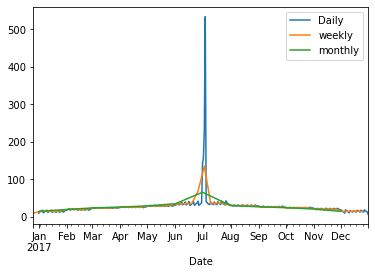

In [9]:
y = df.Sales
y.plot(label='Daily')
y.resample('W').mean().plot(label="weekly")
y.resample('M').mean().plot(label='monthly')
plt.legend()

- I think I already see the anomoly...

### 1.a Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [15]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        inner_lower, inner_upper = cpm.get_lower_and_upper_bounds(df[col], 1.5)
        print(f'the inner lower bound for {col} is {inner_lower}')
#         print(f'the inner upper bound for {col} is {inner_upper}')

the inner lower bound for Temperature is 16.700000000000003
the inner lower bound for Rainfall is 0.26
the inner lower bound for Flyers is 4.0
the inner lower bound for Price is 0.5
the inner lower bound for Sales is 5.0


- Looks fine so far

### 1.b Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [16]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        inner_lower, inner_upper = cpm.get_lower_and_upper_bounds(df[col], 1.5)
#         print(f'the inner lower bound for {col} is {inner_lower}')
        print(f'the inner upper bound for {col} is {inner_upper}')

the inner upper bound for Temperature is 104.7
the inner upper bound for Rainfall is 1.3
the inner upper bound for Flyers is 76.0
the inner upper bound for Price is 0.5
the inner upper bound for Sales is 45.0


- Also nothing unusual about the bounds

### 1.c Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [20]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        inner_lower, inner_upper = cpm.get_lower_and_upper_bounds(df[col], 3)
        print(f'the outer lower bound for {col} is {inner_lower}')
#         print(f'the outer upper bound for {col} is {inner_upper}')

the outer lower bound for Temperature is -16.299999999999997
the outer lower bound for Rainfall is -0.13
the outer lower bound for Flyers is -23.0
the outer lower bound for Price is 0.5
the outer lower bound for Sales is -10.0


- The lower bound for temp is a little unusual, but not off the charts
- Can't have negative rainfall
- Can't have negative flyers, i think
- Can't have negative sales either

### 1.d Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [21]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        inner_lower, inner_upper = cpm.get_lower_and_upper_bounds(df[col], 3)
#         print(f'the outer lower bound for {col} is {inner_lower}')
        print(f'the outer upper bound for {col} is {inner_upper}')

the outer upper bound for Temperature is 137.7
the outer upper bound for Rainfall is 1.69
the outer upper bound for Flyers is 103.0
the outer upper bound for Price is 0.5
the outer upper bound for Sales is 60.0


- That upper temp is too hot
- Otherwise, nothing terribly amiss here

In [24]:
## This code would draw a sns boxplot of all columns with standard outliers
# # iterate through columns and create histograms
# for col in df.columns:
# #     determine that it is a number type
#     if np.issubdtype(df[col].dtype, np.number):
#         inner_lower, inner_upper = cpm.get_lower_and_upper_bounds(df[col], 3)
#         sns.boxplot(data=df, x=col)
#         plt.show()

### 2. a Identify if any columns in lemonade.csv are normally distributed. 

In [26]:
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

<AxesSubplot:>

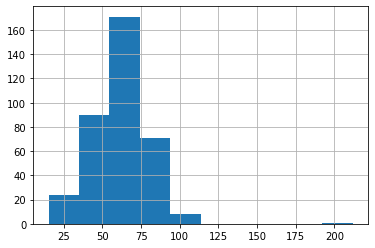

In [27]:
df.Temperature.hist()

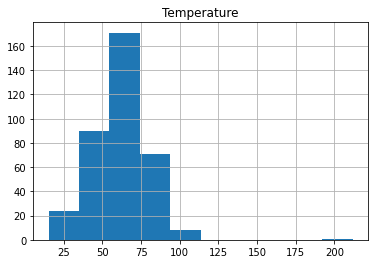

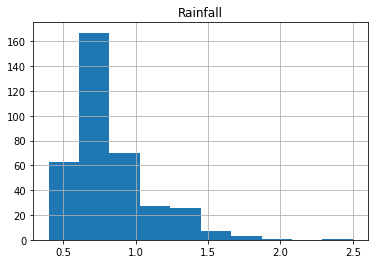

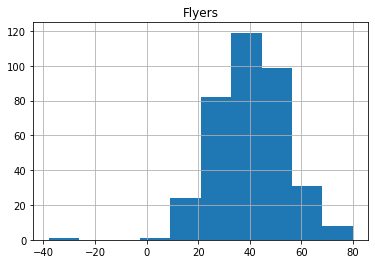

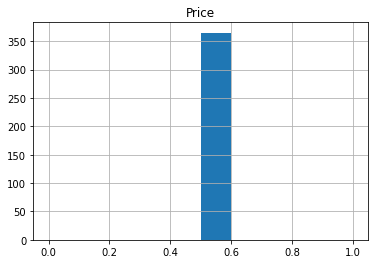

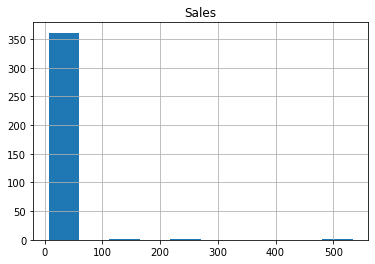

In [31]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(label=col)
        plt.show()

- Temperature, Rainfall and Flyers are normally distributed